In [205]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [206]:
print("Sample 0: ", train_data[0], "\n")
print("Label 0: ", train_labels[0])

Sample 0:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 

Label 0:  1


In [207]:
word_index         = imdb.get_word_index()
word_index_reverse = dict([(value, key) for (key, value) in word_index.items()])

# Indices 0, 1, and 2 are reserved for "padding", "start of sequence", and "unknown"
decoded_review     = " ".join([word_index_reverse.get(i - 3, "?") for i in train_data[0]])
decoded_review[:100]

"? this film was just brilliant casting location scenery story direction everyone's really suited the"

In [208]:
import numpy as np

def multi_hot_encode(sequences, num_classes):
    results = np.zeros((len(sequences), num_classes))
    for i, sequence in enumerate(sequences):
        results[i][sequence] = 1.0
    return results

x_train = multi_hot_encode(train_data, num_classes=10000)
x_test  = multi_hot_encode(test_data, num_classes=10000)

y_train = train_labels.astype("float32")
y_test  = test_labels.astype("float32")

In [209]:
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [210]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [211]:
history = model.fit(x_train, y_train, epochs=6, batch_size=512, validation_split=0.2)
results = model.evaluate(x_test, y_test)
results # test loss, test accuracy

Epoch 1/6
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8181 - loss: 0.4355 - val_accuracy: 0.8864 - val_loss: 0.2784
Epoch 2/6
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9255 - loss: 0.2021 - val_accuracy: 0.8884 - val_loss: 0.2915
Epoch 3/6
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9533 - loss: 0.1350 - val_accuracy: 0.8844 - val_loss: 0.3326
Epoch 4/6
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9664 - loss: 0.1016 - val_accuracy: 0.8774 - val_loss: 0.4018
Epoch 5/6
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9746 - loss: 0.0814 - val_accuracy: 0.8758 - val_loss: 0.4791
Epoch 6/6
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0662 - val_accuracy: 0.8718 - val_loss: 0.5593
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8562 - loss: 0.5925


[0.5924866795539856, 0.8561599850654602]

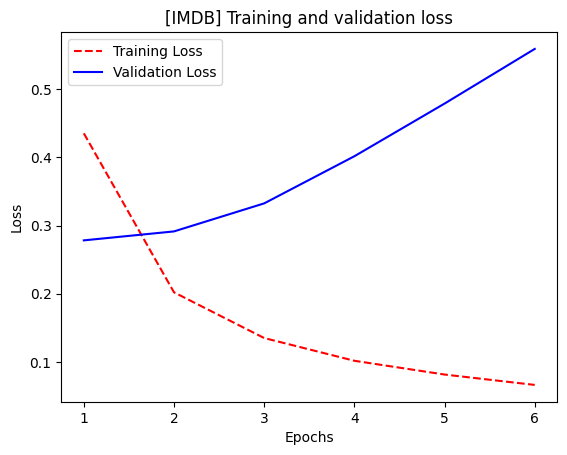

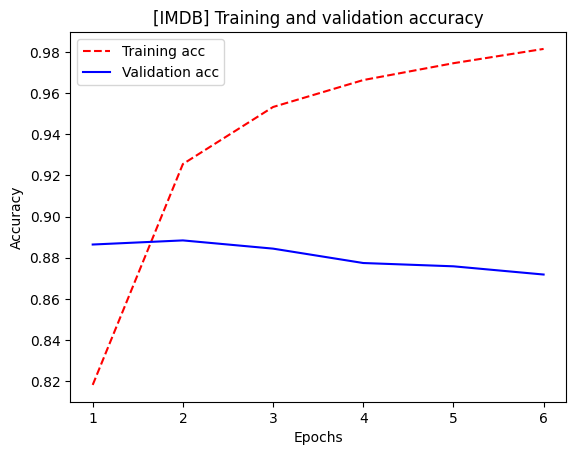

In [212]:
import matplotlib.pyplot as plt

history_dict    = history.history
loss_values     = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs          = range(1, len(loss_values) + 1)

plt.title("[IMDB] Training and validation loss")
plt.plot(epochs, loss_values, "r--", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()

acc     = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.title("[IMDB] Training and validation accuracy")
plt.plot(epochs, acc, "r--", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()